## SP23 CS 477/577: Python for Machine Learning

### Homework 1: Python for basic data processing

This homework aims to help you practice basic Python programing skills using the breast cancer wisconsin dataset. 

Tasks:

[Task 1: Explore the dataset. 40 points](#section1)

[Task 2: Data search. 15 points](#section2)

[Task 3: Study the 'area'feature. 15 points](#section3)

[Task 4: Count data samples. 10 poits](#section4)

[Task 5:Define a function. 20 points](#section5)

## Dataset

    - Number of data samples/rows: 569
    - Each data sample has 30 numeric features/attributes. All features of a data sample form a `feature vector' (each row).
    - The first 10 features were directly calculated using mean feautues of all nuclei in an H&E image(Fig. 1).
    - Only the first 10 features of each data sample will be used in this assignment.
    
    - Each data sample is associated with one class label: 0 or 1
        : 212 Malignant (0)
        : 357 Benign (1)
        
    - Get more details at: 
        https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer
\
![breast image](breastImg.png)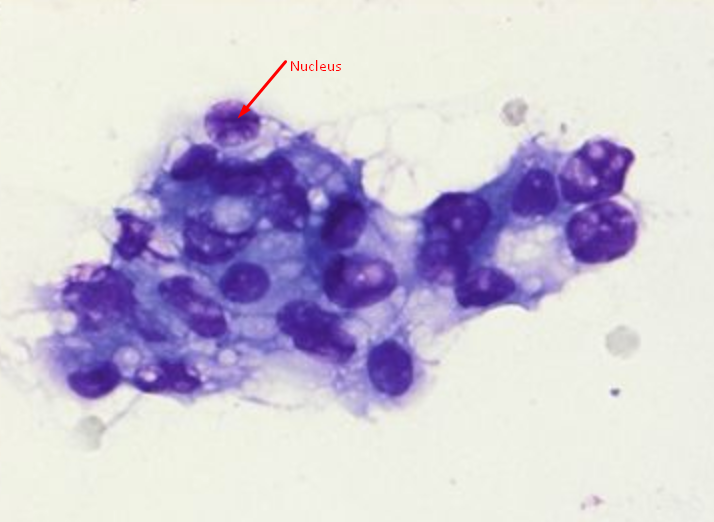

| *Fig. 1. Cell nuclei in a breast histopathology image* | 
|---|
|Fine Needle Aspiration (FNA) biopsy: https://www.cancer.org/cancer/breast-cancer/screening-tests-and-early-detection/breast-biopsy/fine-needle-aspiration-biopsy-of-the-breast.html|
|H&E stain: https://en.wikipedia.org/wiki/H%26E_stain|



In [1]:
import sklearn.datasets as ds
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load dataset
breast_ds = ds.load_breast_cancer()
print('Data fields in breast_ds: \n', dir(breast_ds))
print('\n Dataset description:\n', breast_ds['DESCR'])

Data fields in breast_ds: 
 ['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']

 Dataset description:
 .. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the thre

In [3]:
# we will use the first 10 features in this assignment.
ftrs = breast_ds.data[:, :10] # feature vectors: use the first 10 features
tgts = breast_ds.target # class labels

print('Size of feature vectors: ', ftrs.shape)
print('Size of targets: ', tgts.shape)
print('Target labels:\n', tgts)

Size of feature vectors:  (569, 10)
Size of targets:  (569,)
Target labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 

### Task 1: Explore the dataset.  40 points <a id = "section1"/>

In [4]:
#Task 1.1 check the data type of 'ftrs' and 'tgts', and print it out. 5 points

data_types = (ftrs.dtype, tgts.dtype)


In [5]:
#Task 1.2 print out the the features and class label of the 10th data samples. 5 points
sample_10_features = ftrs[9]
sample_10_label = tgts[9]

In [6]:
#Task 1.3 count and print out the number of malignant samples (0). 5 points
malignant_count = np.sum(tgts == 0)


In [7]:
#Task 1.4 count and print out the number of benign samples (1). 5 points

benign_count = np.sum(tgts == 1)


In [8]:
#Task 1.5 calculate the average (mean) of feature vectors of benign samples: 5 values
#m_bean = 
b_mean = np.mean(ftrs[tgts == 1], axis=0)


In [9]:
#Task 1.6 calculate the average (mean) of feature vectors of malignant samples: 5 values
#m_bean = 
m_mean = np.mean(ftrs[tgts == 0], axis=0)


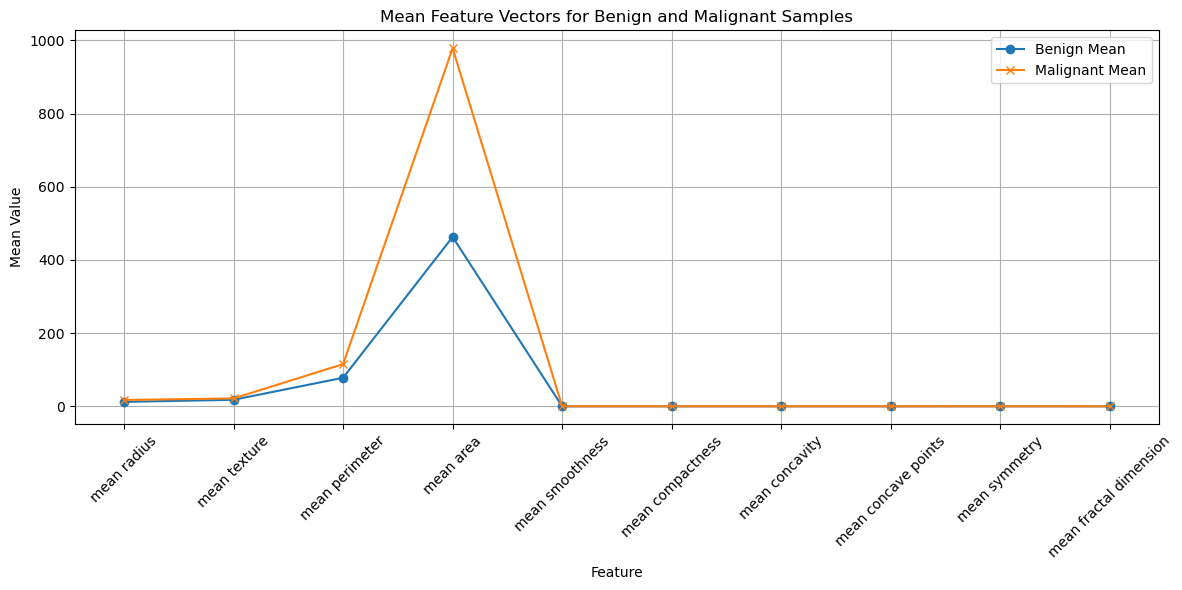

In [10]:
#Task 1.7 plot the mean feature vectors (m_mean, b_mean) using matplotlib. 10 points
from matplotlib import pyplot as plt

# Creating labels for the x-axis
feature_names = breast_ds.feature_names[:10]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(feature_names, b_mean, label='Benign Mean', marker='o')
plt.plot(feature_names, m_mean, label='Malignant Mean', marker='x')
plt.xticks(rotation=45)
plt.xlabel('Feature')
plt.ylabel('Mean Value')
plt.title('Mean Feature Vectors for Benign and Malignant Samples')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Task 2: Data search. 15 points.  <a id = "section2"/>

Let the user input an index (0 to 568) of a data sample, and print out the feature vector and the corresponding class label of that sample.

    - Require multiple searches in one run
    - **Extra 5 points for dealing with abnormal input, e.g., out-of-range index


In [11]:
# tip: use the input() function and while loop

# Task 2: Data Search with User Input

while True:
    try:
        # Prompt the user for an index
        index = input("Enter the index of the data sample (0 to 568) or 'exit' to quit: ")
        
        # Check for exit condition
        if index.lower() == 'exit':
            break

        # Convert input to integer and validate
        index = int(index)
        if index < 0 or index > 568:
            raise ValueError("Index out of range. Please enter a value between 0 and 568.")

        # Print the feature vector and class label
        print("Feature vector:", ftrs[index])
        print("Class label:", "Malignant" if tgts[index] == 0 else "Benign")

    except ValueError as ve:
        print(ve)


Enter the index of the data sample (0 to 568) or 'exit' to quit:  89


Feature vector: [1.464e+01 1.524e+01 9.577e+01 6.519e+02 1.132e-01 1.339e-01 9.966e-02
 7.064e-02 2.116e-01 6.346e-02]
Class label: Benign


Enter the index of the data sample (0 to 568) or 'exit' to quit:  999


Index out of range. Please enter a value between 0 and 568.


Enter the index of the data sample (0 to 568) or 'exit' to quit:  exit


### Task 3.  Study the 'area' (index = 3) feature. 15 points  <a id = "section3"/>

Benign Samples - Area Feature
Mean: 462.7901960784313
Min: 143.5
Max: 992.1


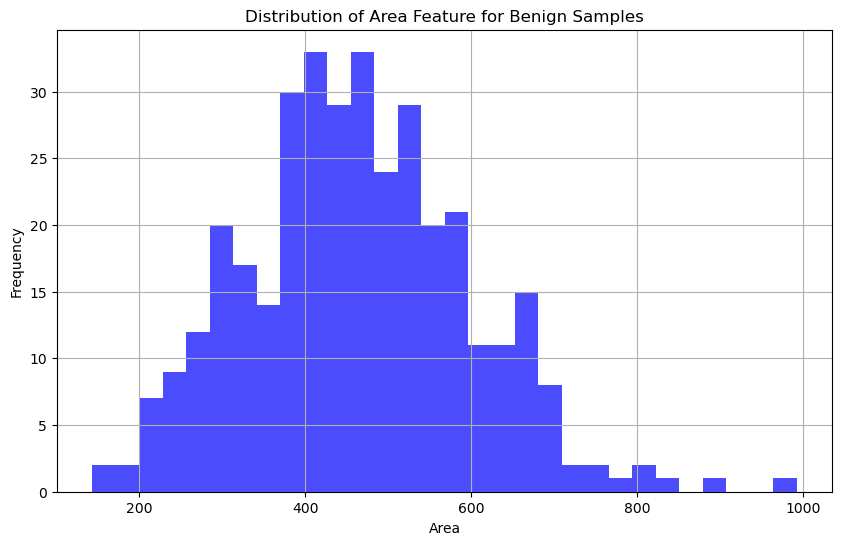

In [12]:
# Task 3.1: Calculate and print out the mean, min, and max values of the feature 'area' (index 3) for all benign samples.

# Extract the 'area' feature (index 3) for benign samples
benign_area = ftrs[tgts == 1, 3]

# Calculate mean, min, and max for benign samples
benign_area_mean = np.mean(benign_area)
benign_area_min = np.min(benign_area)
benign_area_max = np.max(benign_area)

# Print the results for benign samples
print("Benign Samples - Area Feature")
print("Mean:", benign_area_mean)
print("Min:", benign_area_min)
print("Max:", benign_area_max)

# Plot the area features of all benign samples
plt.figure(figsize=(10, 6))
plt.hist(benign_area, bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Area Feature for Benign Samples')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Malignant Samples - Area Feature
Mean: 978.3764150943397
Min: 361.6
Max: 2501.0


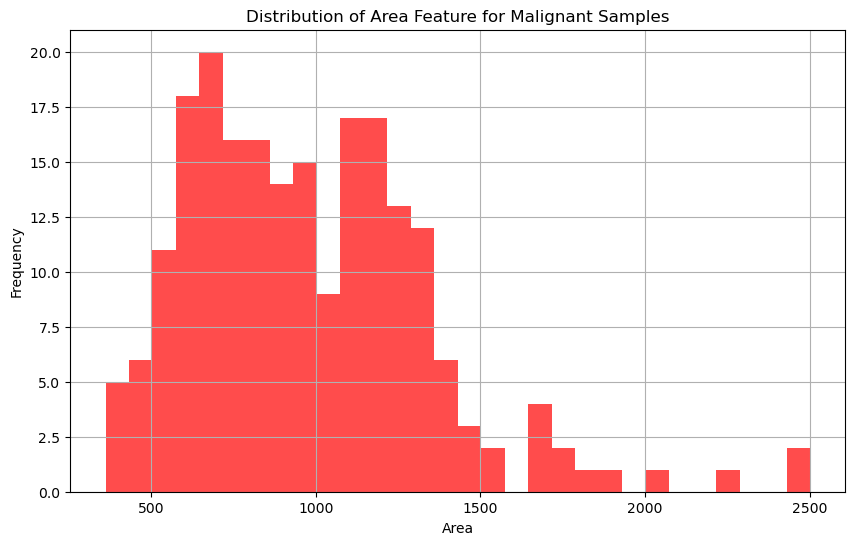

In [13]:
# Task 3.2: Calculate and print out the mean, min, and max values of the feature 'area' (index 3) for all malignant samples.

# Extract the 'area' feature (index 3) for malignant samples
malignant_area = ftrs[tgts == 0, 3]

# Calculate mean, min, and max for malignant samples
malignant_area_mean = np.mean(malignant_area)
malignant_area_min = np.min(malignant_area)
malignant_area_max = np.max(malignant_area)

# Print the results for malignant samples
print("Malignant Samples - Area Feature")
print("Mean:", malignant_area_mean)
print("Min:", malignant_area_min)
print("Max:", malignant_area_max)

# Plot the area features of all malignant samples
plt.figure(figsize=(10, 6))
plt.hist(malignant_area, bins=30, color='red', alpha=0.7)
plt.title('Distribution of Area Feature for Malignant Samples')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### Task 3.3: What observations can you get from the results of Tasks 3.1 and 3.2?

Response:
I can see the difference in mean values, which suggests that, on average, malignant tumours tend to have a larger area compared to benign tumours. Also, we can see that there is a Range of Area Values, which indicates greater variability in the size of malignant tumours. Also, the Distribution patterns are different. Benign samples might show a more concentrated distribution around a smaller mean area, whereas malignant samples might display a more spread-out distribution, indicating larger and more varied tumour sizes. 







### Task 4:   Count data samples. 10 points<a id = "section4"/> 



In [14]:
# Task 4.1: Count the number of malignant samples that have 'area' (index 3) value less than 600.

# Extract the 'area' feature (index 3) for malignant samples
malignant_area = ftrs[tgts == 0, 3]

# Count the number of malignant samples with area less than 600
malignant_count_less_than_600 = np.sum(malignant_area < 600)


In [15]:
# Task 4.2: Count the number of benign samples that have 'area' (index 3) values less than 600.

# Extract the 'area' feature (index 3) for benign samples
benign_area = ftrs[tgts == 1, 3]

# Count the number of benign samples with area less than 600
benign_count_less_than_600 = np.sum(benign_area < 600)

malignant_count_less_than_600, benign_count_less_than_600


(31, 304)

### Task 5: Define a function. 20 points <a id = "section5"/>

Define a function that calculates and return the Euclidean distance between any two given data samples
 

In [16]:
# Task 5.1
def Eclidean(a, b):
    '''
        inputs:a, b: feature vectors of two patients
        
        return: d: the distance
    '''
    
    return np.sqrt(np.sum((a-b) ** 2))



# test
print('two malignant samples:', Eclidean(ftrs[1], ftrs[2])) # two maliganant samples
print('two benign samples:', Eclidean(ftrs[19], ftrs[20])) # two benign samples
print('between two mean vectors:', Eclidean(b_mean, m_mean)) # betwwen means

two malignant samples: 123.08662898837753
two benign samples: 46.35812850705252
between two mean vectors: 516.9734937120692


In [17]:
# Task 5.2 calculate and print out the Eclidean distance between 
# every feature vector (ftrs[i]) and the mean feature vector of maliganant samples (m_mean)
distances_to_m_mean = [Eclidean(ftrs[i], m_mean) for i in range(ftrs.shape[0])]




# Print out the Euclidean distances
for i, distance in enumerate(distances_to_m_mean):
    print(f'Distance of sample {i} to malignant mean:', distance)



Distance of sample 0 to malignant mean: 26.33286841188874
Distance of sample 1 to malignant mean: 348.100547954307
Distance of sample 2 to malignant mean: 225.11112082189712
Distance of sample 3 to malignant mean: 593.5125407983936
Distance of sample 4 to malignant mean: 319.32932515401563
Distance of sample 5 to malignant mean: 502.40778179535005
Distance of sample 6 to malignant mean: 61.795325836513186
Distance of sample 7 to malignant mean: 401.28462000832985
Distance of sample 8 to malignant mean: 459.4439860471249
Distance of sample 9 to malignant mean: 503.4870301449081
Distance of sample 10 to malignant mean: 181.0332464755555
Distance of sample 11 to malignant mean: 197.76883065979666
Distance of sample 12 to malignant mean: 145.6684522159039
Distance of sample 13 to malignant mean: 196.04450674669724
Distance of sample 14 to malignant mean: 400.6866907488999
Distance of sample 15 to malignant mean: 320.1876522604738
Distance of sample 16 to malignant mean: 294.6161712899466
D